---
title: "Thomas Fire SB"
description: "a short catchy description of the blog post"
author:
  - name: Naomi Moraes
    url: https://nmoraescommit.github.io/
    affilitation-url: https://bren.ucsb.edu/masters-programs/master-environmental-data-science
date: 2024-10-18
categories: [Python, MEDS, Geospatial]
toc: true
image: ThomasFire-coverpic.png # put in folder as with csl:
citation:
  url: https://nmoraescommit.github.io/blog/2024-12-01-thomas-fire-sb
draft: false
draft-mode: visible
---

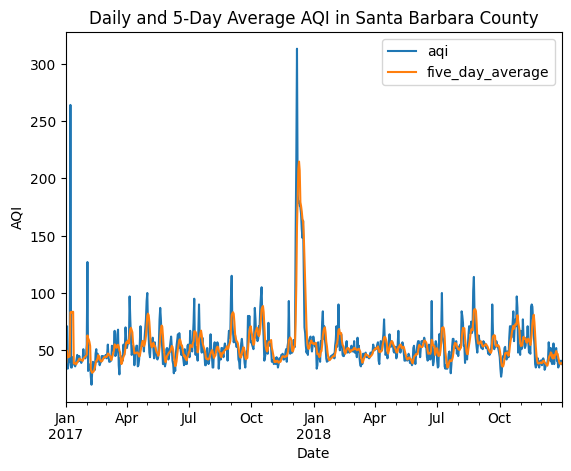

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

# Concatenate both dataframes
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Create filter Santa Barbara df with dropped columns
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'], axis = 1)
               
# Change 'date' to datetime and set to index
aqi_sb.date = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')
               
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()
               
# Create column with new variable 'rolling_variable'
aqi_sb['five_day_average'] = rolling_average
               
# Create plot with daily AQI and 5-day averages
daily_aqi_plot = aqi_sb[['aqi','five_day_average']].plot(title = 'Daily and 5-Day Average AQI in Santa Barbara County',
                                  xlabel = 'Date',
                                  ylabel = 'AQI')

Fire perimeter data retrieval and selection

Author: Naomi Moraes

Link: https://github.com/nmoraescommit/eds220-hw4/tree/main

About

Purpose: The purpose of this notebook is to explore, clean, and analyze the California fire perimeter shapefile, published by CAL FIRE. This is to obtain the Thomas Fire perimeter boundary for use in "hwk4-task2-false-color-MORAES".
Highlights: Working with this dataset was illuminating in looking at how state agencies store fire data and the aspects state agecies deem important to record, the fact that there is a start and end date to the observations, as well as learning how to store updated shape files. I consider the practice in setting up an entirely new project from scratch to be quite valuable, along with the process of independantly learning to access data for a continous workflow, important.
About the data: This dataset was published and maintained by CAL FIRE, but accessed through Data.gov. The statewide fire history geospatial dataset is updated annually from the previous fire season, during spring, from units across the state and cooperating agencies. The first version was released in May 2015 - according the the CalFire site.
References:
Fire perimeter data: Publisher CAL FIRE. (2024, May 14). State of California - california fire perimeters (all). Catalog. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436
Assignment Reference and Cleaned Landsat Data Access : Galaz-Garcia, C. (n.d.). Assignment 4. assignment4 – EDS 220 - Working with Environmental Datasets. https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html

Set-Up
In this section we will import the appropriate libraries and data to complete this workbook.

Import Libraries

In [2]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

Import Data

In [3]:
# Create data filepath
fp = os.path.join('data','California_Fire_Perimeters_(all).shp')

# Create dataframe for CA fire perimeter shapefile
ca_fire_perimeter = gpd.read_file(fp)

Explore Data
In this section we will take a preliminary look at the imported fire perimeter data - in order to understand how to extract the Thomas Fire perimenter data.

In [4]:
# Check dataframe head
ca_fire_perimeter.head(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,NaN,NaN,{7985848C-0AC2-4BA4-8F0E-29F778652E61},NaN,NaN,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,NaN,NaN,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},NaN,NaN,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,NaN,NaN,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},NaN,NaN,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [5]:
# Check dataframe tail
ca_fire_perimeter.tail(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
22258,0,CA,CCO,MRN,UKNOWN,NaN,1899-12-30,1899-12-30,14,6,1,2927.2400,1917-34(Yr Not Report)MarinCo FireChief Garber...,NaN,NaN,NaN,NaN,0,"POLYGON ((-13658666.186 4605853.097, -13658738..."
22259,0,CA,CCO,MRN,UKNOWN,NaN,1899-12-30,1899-12-30,14,6,1,62.0127,1917-34(Yr Not Report)MarinCo FireChief Garber...,NaN,NaN,NaN,NaN,0,"POLYGON ((-13644249.827 4580277.586, -13644243..."
22260,0,CA,CCO,MRN,UKNOWN,NaN,1899-12-30,1899-12-30,14,6,1,40.0137,1917-34(Yr Not Report)MarinCo FireChief Garber...,NaN,NaN,NaN,NaN,0,"POLYGON ((-13640708.376 4580839.378, -13640603..."


In [6]:
# Check columns
ca_fire_perimeter.columns

Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM',
       'COMPLEX_ID', 'DECADES', 'geometry'],
      dtype='object')

In [7]:
# Check column datatypes
ca_fire_perimeter.dtypes

YEAR_            int64
STATE           object
AGENCY          object
UNIT_ID         object
FIRE_NAME       object
INC_NUM         object
ALARM_DATE      object
CONT_DATE       object
CAUSE            int64
C_METHOD         int64
OBJECTIVE        int64
GIS_ACRES      float64
COMMENTS        object
COMPLEX_NA      object
IRWINID         object
FIRE_NUM        object
COMPLEX_ID      object
DECADES          int64
geometry      geometry
dtype: object

In [8]:
# Check CRS - and type
ca_fire_perimeter.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

After the exploration of the California perimeter shape file, imported into this notebook, I see that is has 22,260 fire perimeter observations with columns for varied descriptive markers including: year, fire name, alarm date, and geometery. I observe that some of the column data types int64 and float64, however, I may want to change the date columns into datetime objects for manipulation. The CRS of this shapefile is a projected coordinate reference system, EPSG: 3857 and is a popular crs for web mapping services.

Clean Data
In this section, I will convert the column names to a lower snake case, as well as the date columns to DateTime objects - for ease of future data manipulation.

In [9]:
# Simplify column names by replacing spaces and no capitilization
ca_fire_perimeter.columns = (ca_fire_perimeter.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Make dates into DateTime object
ca_fire_perimeter.alarm_date = pd.to_datetime(ca_fire_perimeter.alarm_date)
ca_fire_perimeter.cont_date = pd.to_datetime(ca_fire_perimeter.cont_date)

Thomas Fire Boundary
Here, I will select for the Thomas Fire Boundary (2017), and save it as a new geospatial file.

In [10]:
# Select Thomas Fire in 2017
thomas_fire_boundary = ca_fire_perimeter[(ca_fire_perimeter['alarm_date'] > '2016-12-31') & 
                                         (ca_fire_perimeter['alarm_date'] < '2018-01-01') &
                                         (ca_fire_perimeter['fire_name'] == 'THOMAS')]

In [11]:
# View dataframe
thomas_fire_boundary

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,NaN,NaN,NaN,NaN,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [12]:
# Save dataframe as geospatial file in /data folder
thomas_fire_boundary.to_file('data/thomas_fire_boundary.geojson', driver = 'GeoJSON')

File Shape Explanation
I chose to convert the alarm_date and cont_date variables into DateTime objects, and wanted them to retain that data type. As I would need to convert DateTime objects back into strings to save as shapefile, I chose to store the new data frame as a GeoJSON file.